# Task 6. Algorithms on graphs. Path search algorithms on weighted graphs 
### Sarafanov Michail, Big Data and Machine Learning, C4134

In [173]:
# Download all the necessary libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt 
import math
import pandas as pd
import random
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
import timeit 
import heapq

In [104]:
def generate_weighted_graph(nnodes, nedges):
    shape = (nnodes,nnodes)
    G = nx.gnm_random_graph(n=nnodes, m=nedges, directed = False)
    print(nx.info(G), '\n')
    
    for (u, v) in G.edges():
        G.edges[u,v]['weight'] = random.randint(1,30)
    
    matrix = nx.adjacency_matrix(G)
    matrix = matrix.toarray()
    
    return(matrix, G)

G_adj_matrix, G = generate_weighted_graph(nnodes = 100, nedges = 2000)

print('Adjacency matrix')
G_adj_dataframe = pd.DataFrame(G_adj_matrix)
print(G_adj_dataframe[[0,1,2,3,4,5,6,7,8,9]].head(10))

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 2000
Average degree:  40.0000 

Adjacency matrix
    0   1   2   3  4   5   6   7   8   9
0   0  24  18   0  0  26   2   0  24   0
1  24   0  22   0  0  23   0   0   6  24
2  18  22   0   0  0   0   0   0   0  12
3   0   0   0   0  0   0  24   0  22   0
4   0   0   0   0  0   0   0   0   1   0
5  26  23   0   0  0   0  23   0   0   7
6   2   0   0  24  0  23   0  22  23   0
7   0   0   0   0  0   0  22   0   0   0
8  24   6   0  22  1   0  23   0   0   0
9   0  24  12   0  0   7   0   0   0   0


We can see, that the matrix turned out to be symmetric and contains only zeros and weights.

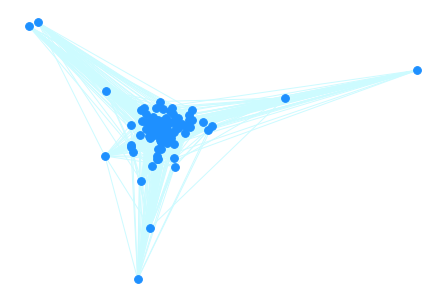

In [105]:
nx.draw(G, pos = nx.spectral_layout(G), node_color='#1E90FF', node_size=60, edge_color='#CDFBFF', with_labels=False)

In [106]:
# Randomly select the initial vertex in the graph
Start = np.random.randint(0,100)
Stops = np.arange(0,100,1)
for Stop in Stops:
    if Start == Stop:
        Stops = np.delete(Stops, Stop)
print('Start vertex is -', Start)
print('Over vertices -', Stops)

Start vertex is - 58
Over vertices - [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]


## Dijkstra's algorithm

In [107]:
dijkstra_times = []
for i in range(0,10):
    start_time = timeit.default_timer() # Start to time
    
    for Stop in Stops:
        d_path = nx.dijkstra_path(G, source = Start, target = Stop, weight = "weight")
        # Display some data on the screen
        if i == 0 and any(Stop == [0,1,2,3,4,5]):
            print("The shortest path between the vertex ", Start," and the vertex ", Stop, " is -", d_path, '\n')
    
    dijkstra_times.append(timeit.default_timer() - start_time) # Finish and write the result to the list
    
dijkstra_times = np.array(dijkstra_times)
print("The time required to find the paths between a random starting vertex and other vertices for Dijkstra's algorithm", np.mean(dijkstra_times))

The shortest path between the vertex  58  and the vertex  0  is - [58, 10, 65, 0] 

The shortest path between the vertex  58  and the vertex  1  is - [58, 10, 65, 1] 

The shortest path between the vertex  58  and the vertex  2  is - [58, 66, 88, 2] 

The shortest path between the vertex  58  and the vertex  3  is - [58, 63, 81, 3] 

The shortest path between the vertex  58  and the vertex  4  is - [58, 66, 4] 

The shortest path between the vertex  58  and the vertex  5  is - [58, 10, 65, 5] 

The time required to find the paths between a random starting vertex and other vertices for Dijkstra's algorithm 0.18461863999982597


## Bellman-Ford algorithm

In [109]:
bellman_ford_times = []
for i in range(0,10):
    start_time = timeit.default_timer() # Start to time
    
    for Stop in Stops:
        bf_path = nx.bellman_ford_path(G, source = Start, target = Stop, weight = "weight") 
        if i == 0 and any(Stop == [0,1,2,3,4,5]):
            print("The shortest path between the vertex ", Start," and the vertex ", Stop, " is -", bf_path, '\n')
    
    bellman_ford_times.append(timeit.default_timer() - start_time) # Finish and write the result to the list
    
bellman_ford_times = np.array(bellman_ford_times)
print("The time required to find the paths between a random starting vertex and other vertices for Bellman-Ford algorithm", np.mean(bellman_ford_times))

The shortest path between the vertex  58  and the vertex  0  is - [58, 10, 65, 0] 

The shortest path between the vertex  58  and the vertex  1  is - [58, 39, 73, 36, 1] 

The shortest path between the vertex  58  and the vertex  2  is - [58, 66, 88, 2] 

The shortest path between the vertex  58  and the vertex  3  is - [58, 63, 81, 3] 

The shortest path between the vertex  58  and the vertex  4  is - [58, 66, 4] 

The shortest path between the vertex  58  and the vertex  5  is - [58, 10, 65, 5] 

The time required to find the paths between a random starting vertex and other vertices for Bellman-Ford algorithm 0.7916588400000364


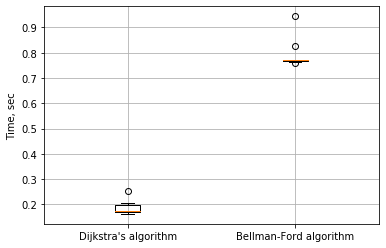

In [130]:
plt.boxplot((dijkstra_times, bellman_ford_times), notch=False, sym="o",labels=["Dijkstra's algorithm", "Bellman-Ford algorithm"])
plt.grid()
plt.ylabel('Time, sec')
plt.show()

As you can see from the graph, the Bellman-Ford algorithm finds the shortest path in more time. 

At the same time, some of the ways that the algorithms found may differ. For example, the path from vertex 58 to 1 by Dijkstra's algorithm - [58, 10, 65, 1], and according to the Bellman-Ford algorithm - [58, 39, 73, 36, 1]. In most cases, the routes found by the algorithms are the same.

## A*

In [515]:
cell_grid = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 1, 1, 0, 0, 0, 0, 0, 1, 0],
                      [0, 1, 0, 0, 1, 1, 1, 1, 1, 0],
                      [0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 1, 0, 1, 1, 0, 0],
                      [0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
                      [0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
                      [0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
                      [1, 1, 1, 1, 1, 1, 0, 1, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

[[2 2]
 [4 1]
 [2 3]
 [4 5]
 [5 5]
 [4 2]
 [5 2]
 [1 3]
 [4 0]
 [0 2]]
[[6 8]
 [7 9]
 [9 8]
 [6 9]
 [7 5]
 [7 6]
 [7 4]
 [6 8]
 [5 8]
 [8 8]]
Amount of obstacles - 30


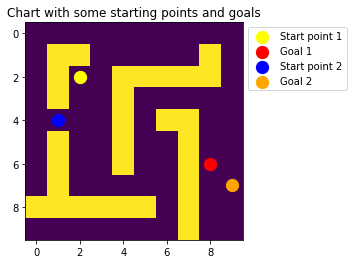

In [635]:
# List of vertices that are obstacles 
where_obstacles = np.argwhere(cell_grid == 1)

i = 0
starts = []
while i < 10:
    Start = np.random.randint(0,6, size=2)   
    if any(tuple(Start) == tuple(obstacle) for obstacle in where_obstacles):
        pass
    else:
        starts.append(Start)
        i += 1
        
i = 0        
goals = [] 
while i < 10:
    Goal = np.random.randint(4,10, size=2)
    if any(tuple(Goal) == tuple(obstacle) for obstacle in where_obstacles):
        pass
    else:
        goals.append(Goal)
        i += 1
        
starts = np.array(starts)
goals = np.array(goals)

print(starts)
print(goals)

print('Amount of obstacles -', len(np.argwhere(cell_grid == 1)))
plt.scatter(starts[0,1], starts[0,0], c = 'yellow', s = 150, label = 'Start point 1')
plt.scatter(goals[0,1], goals[0,0], c = 'red', s = 150, label = 'Goal 1')
plt.scatter(starts[1,1], starts[1,0], c = 'blue', s = 150, label = 'Start point 2')
plt.scatter(goals[1,1], goals[1,0], c = 'orange', s = 150, label = 'Goal 2')
plt.imshow(cell_grid)
plt.title('Chart with some starting points and goals')
plt.legend(bbox_to_anchor=(1, 0.5, 0.5, 0.5))
plt.show()

In [657]:
def astar_search(Start, Goal, cell_grid, iteration):    
    # List of vertices that are obstacles 
    where_obstacles = np.argwhere(cell_grid == 1)
    obstacles = []
    for i in where_obstacles:
        i = tuple(i)
        obstacles.append(i)
    obstacles = tuple(obstacles)

    good_vertices = []
    # Get a list of vertices that are not obstacles
    for i in range(0,10):
        for j in range(0,10):
            vertex = (i,j)
            if any(vertex == obstacle for obstacle in obstacles):
                pass
            else:
                good_vertices.append(vertex) 

    # Transform the indices of the start and goal points into tuples
    start = tuple(Start)
    goal = tuple(Goal)

    # The graph is based on a 10 by 10 grid
    Grid_graph = nx.grid_2d_graph(m = 10, n = 10) 
    
    if iteration == 0:       
        nx.draw(Grid_graph, pos = nx.spectral_layout(Grid_graph), node_color='#1E90FF', 
                node_size=60, edge_color='#CDFBFF', with_labels=False)
        plt.title('Graph before setting weights')
        plt.show()

    # We set the edges of the graph certain properties
    for obstacle in obstacles:
        x = obstacle[0]
        y = obstacle[1]
        if x + 1 <= 9:
            neib_vertex_1 = (x + 1, y)
            attrs = {(neib_vertex_1, obstacle): {'weight': 10},
                    (obstacle, neib_vertex_1): {'weight': 10}}
            nx.set_edge_attributes(Grid_graph, attrs)
        if x - 1 >= 0:
            neib_vertex_2 = (x - 1, y)
            attrs = {(neib_vertex_2, obstacle): {'weight': 10},
                    (obstacle, neib_vertex_2): {'weight': 10}}
            nx.set_edge_attributes(Grid_graph, attrs)
        if y + 1 <= 9:
            neib_vertex_3 = (x, y + 1)
            attrs = {(neib_vertex_3, obstacle): {'weight': 10},
                    (obstacle, neib_vertex_3): {'weight': 10}}
            nx.set_edge_attributes(Grid_graph, attrs)
        if y - 1 >= 0:
            neib_vertex_4 = (x, y - 1)
            attrs = {(neib_vertex_4, obstacle): {'weight': 10},
                    (obstacle, neib_vertex_4): {'weight': 10}}
            nx.set_edge_attributes(Grid_graph, attrs)
        if x + 1 <= 9 and y + 1 <= 9:
            neib_vertex_5 = (x + 1, y + 1)
            attrs = {(neib_vertex_5, obstacle): {'weight': 10},
                    (obstacle, neib_vertex_5): {'weight': 10}}
            nx.set_edge_attributes(Grid_graph, attrs)
        if x - 1 >= 0 and y - 1 >= 0:
            neib_vertex_6 = (x - 1, y - 1)
            attrs = {(neib_vertex_6, obstacle): {'weight': 10},
                    (obstacle, neib_vertex_6): {'weight': 10}}
            nx.set_edge_attributes(Grid_graph, attrs)
        if x + 1 <= 9 and y - 1 >= 0:
            neib_vertex_7 = (x + 1, y - 1)
            attrs = {(neib_vertex_7, obstacle): {'weight': 10},
                    (obstacle, neib_vertex_7): {'weight': 10}}
            nx.set_edge_attributes(Grid_graph, attrs)       
        if x - 1 >= 0 and y + 1 <= 9:
            neib_vertex_8 = (x - 1, y + 1)
            attrs = {(neib_vertex_8, obstacle): {'weight': 10},
                    (obstacle, neib_vertex_8): {'weight': 10}}
            nx.set_edge_attributes(Grid_graph, attrs)

    def heuristic_distance(a, b):
        (x1, y1) = a
        (x2, y2) = b
        return(((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5)

    Astar_path = nx.astar_path(Grid_graph, source = start, target = goal, heuristic = heuristic_distance, weight='weight')
    print('The Path is -', Astar_path)
    Astar_path = np.array(Astar_path)

    plt.scatter(Start[1], Start[0], c = 'yellow', s = 150, label = 'Start point')
    plt.scatter(Goal[1], Goal[0], c = 'red', s = 150, label = 'Goal')
    plt.plot(Astar_path[:,1],Astar_path[:,0], color = "red")
    plt.imshow(cell_grid)
    plt.legend(bbox_to_anchor=(1, 0.5, 0.5, 0.5))
    plt.show()

Iteration  1


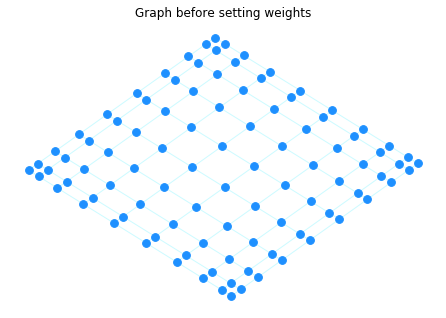

The Path is - [(2, 2), (2, 3), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (6, 8)]


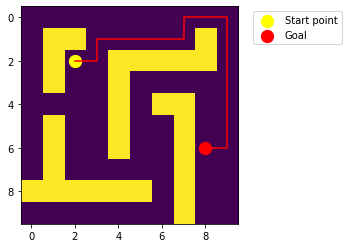

Iteration  2
The Path is - [(4, 1), (4, 2), (4, 3), (5, 3), (6, 3), (7, 3), (7, 4), (7, 5), (6, 5), (5, 5), (4, 5), (3, 5), (3, 6), (3, 7), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8), (7, 9)]


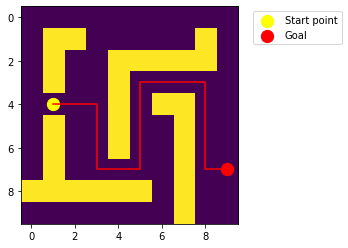

Iteration  3
The Path is - [(2, 3), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9), (9, 8)]


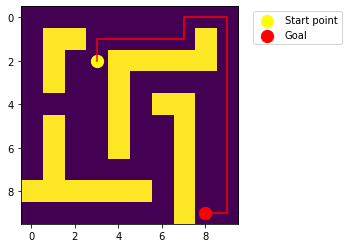

Iteration  4
The Path is - [(4, 5), (3, 5), (3, 6), (3, 7), (3, 8), (4, 8), (5, 8), (6, 8), (6, 9)]


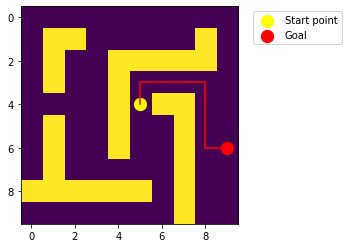

Iteration  5
The Path is - [(5, 5), (6, 5), (7, 5)]


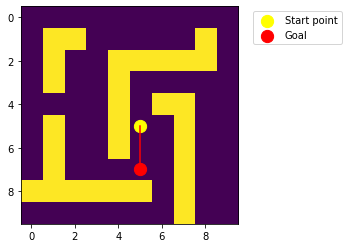

Iteration  6
The Path is - [(4, 2), (4, 3), (5, 3), (6, 3), (7, 3), (7, 4), (7, 5), (7, 6)]


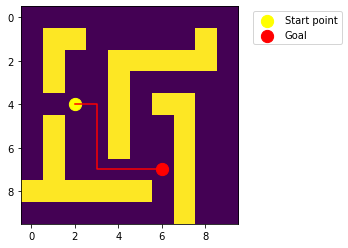

Iteration  7
The Path is - [(5, 2), (6, 2), (6, 3), (7, 3), (7, 4)]


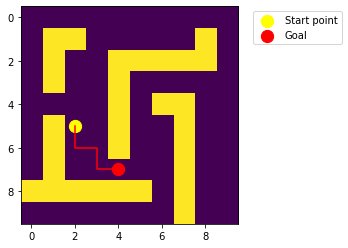

Iteration  8
The Path is - [(1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (6, 8)]


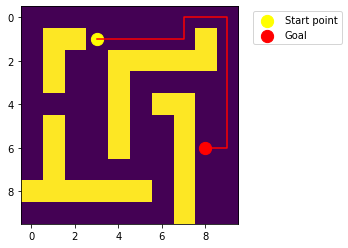

Iteration  9
The Path is - [(4, 0), (4, 1), (4, 2), (4, 3), (5, 3), (6, 3), (7, 3), (7, 4), (7, 5), (6, 5), (5, 5), (4, 5), (3, 5), (3, 6), (3, 7), (3, 8), (4, 8), (5, 8)]


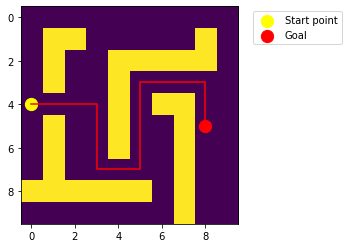

Iteration  10
The Path is - [(0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (8, 8)]


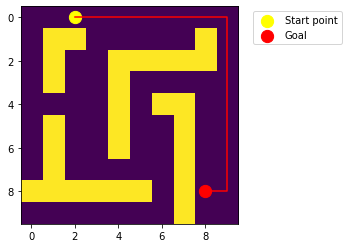

The average runtime of the A* algorithm (along with graphing) is - 0.564539880000666


In [659]:
times = []
for i in range(0, len(starts)):
    start_time = timeit.default_timer() # Start to time
    start = starts[i]
    goal = goals[i]
    print('Iteration ', i + 1)
    astar_search(start, goal, cell_grid, i)
    times.append(timeit.default_timer() - start_time) # Finish and write the result to the list
times = np.array(times)
print('The average runtime of the A* algorithm (along with graphing) is -', np.mean(times))

As can be seen from the graphs, the A* algorithm copes with the task of finding the shortest path quickly and correctly.